In [34]:
using Images
using Colors
using StaticArrays

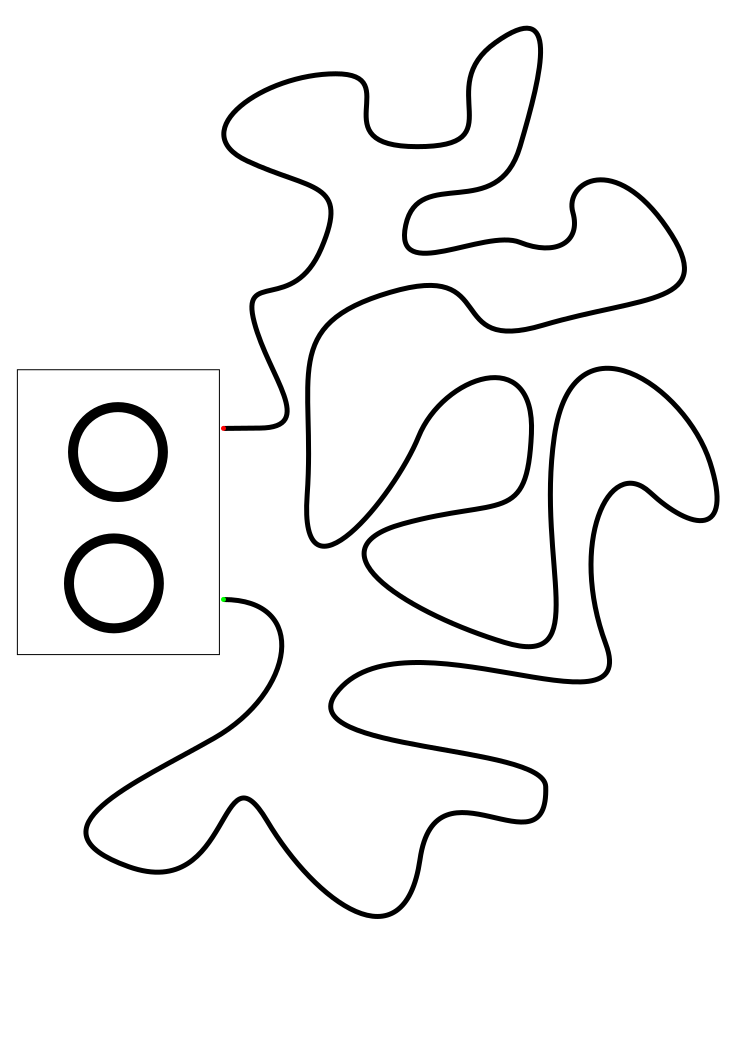

In [72]:
im = RGB{Float32}.(load("cassette.png"))

In [73]:
p = ind2sub(im, indmax((px -> green(px) / (red(px) + green(px) + blue(px))).(im)))
im[p...]

In [74]:
rot2(θ) = SMatrix{2, 2}(cos(θ), -sin(θ), sin(θ), cos(θ))

rot2 (generic function with 1 method)

In [97]:
function successor(im::Matrix, p, direction)
    for θ in (0, -π/8, π/8, -π/4, π/4, -π/3, π/3, -π/2, π/2)
        R = rot2(θ)
        d = R * direction
        p2 = round.(Int, p .+ d)
        if blue(im[p2...]) < 0.5
            return p2, d
        end
    end
    error("could not find a successor: $p, $direction")
end
    
function finished(im::Matrix, p)
    px = im[p...]
    return red(px) / (red(px) + green(px) + blue(px)) > 0.5
end

finished (generic function with 1 method)

In [98]:
p = SVector{2, Int}(ind2sub(im, indmax((px -> green(px) / (red(px) + green(px) + blue(px))).(im))))
direction = SVector(0, 1)
path = [p]
while !finished(im, p)
    p, direction = successor(im, p, direction)
    push!(path, p)
end

In [100]:
length(path)

4971

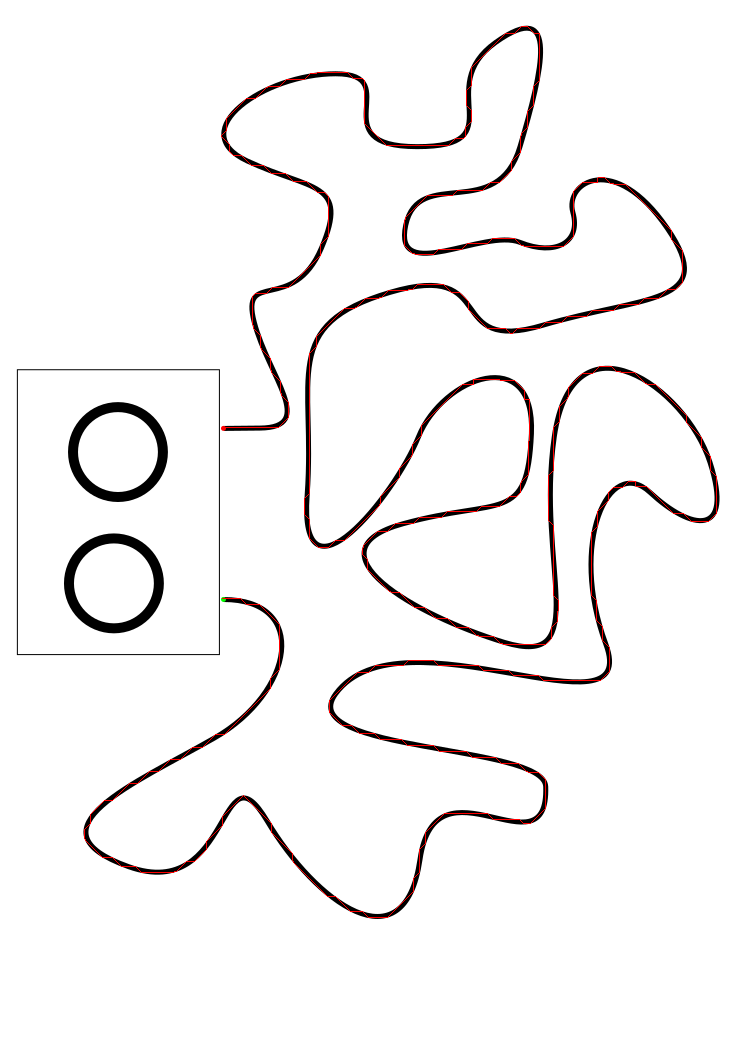

In [99]:
im2 = copy(im)
for p in path
    im2[p...] = RGB(1., 0, 0)
end
save("path.png", im2)
im2